In [19]:
import matplotlib.pyplot as plt

def draw_rectangle(start_x, start_y, width, height, line_color='black', fill_color=None, line_width=1.0):
    rect = plt.Rectangle((start_x, start_y), width, height, edgecolor=line_color, fill=fill_color is not None, linewidth=line_width, facecolor=fill_color)
    plt.gca().add_patch(rect)

def draw_line(start_x, start_y, end_x, end_y, line_color='black', line_width=1.0):
    plt.plot([start_x, end_x], [start_y, end_y], color=line_color, linewidth=line_width)

def draw_circle(center_x, center_y, radius, line_color='black', fill_color=None, line_width=1.0):
    circle = plt.Circle((center_x, center_y), radius, edgecolor=line_color, fill=fill_color is not None, linewidth=line_width, facecolor=fill_color)
    plt.gca().add_patch(circle)

[0.24862237 0.37309562 0.58363047 0.8       ]


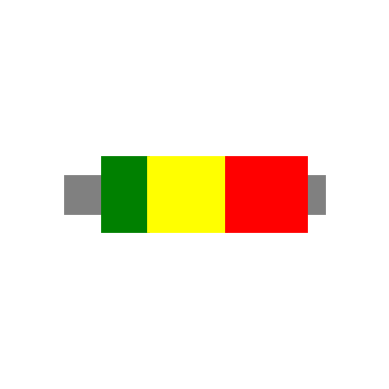

In [34]:
import numpy as np
plt.figure()
a = 0.2
b = 0.8
limits = np.array([100, 356, 789, 1234])
limits = limits/np.max(limits)
limits = a + limits * (b - a)
print(limits)

draw_rectangle(0.15, 0.45, 0.7, 0.1, line_color='gray', fill_color='gray', line_width=2.0)
draw_rectangle(limits[0], 0.4, limits[1] - limits[0], 0.2, line_color='green', fill_color='green', line_width=2.0)
draw_rectangle(limits[1], 0.4, limits[2] - limits[1], 0.2, line_color='yellow', fill_color='yellow', line_width=2.0)
draw_rectangle(limits[2], 0.4, limits[3] - limits[2], 0.2, line_color='red', fill_color='red', line_width=2.0)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()